<a href="https://colab.research.google.com/github/ronnie9723/AI_LAB/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [141]:
import pandas as pd #data manipulation tool 
import seaborn as sns #data visualization library
import numpy as np #Python library that provides a simple yet powerful data structure: the n-dimensional array.

In [142]:
train = pd.read_csv('gdrive/My Drive/Artificial intelligence projects/train.csv') #this will link google drive dataset to colab

In [143]:
train.head() #head method will show top 5 row of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
train.shape #shape returns array (row value, colum value)

(891, 12)

In [145]:
train.info() #show information of dataset with missing or uncomplete dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [146]:
train.isnull().sum() #to see only null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [147]:
import matplotlib.pyplot as plt #data visualizatoin library
%matplotlib inline
import seaborn as sns
sns.set()

In [148]:
def bar_chart(feature):   #def for define here a function is created
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

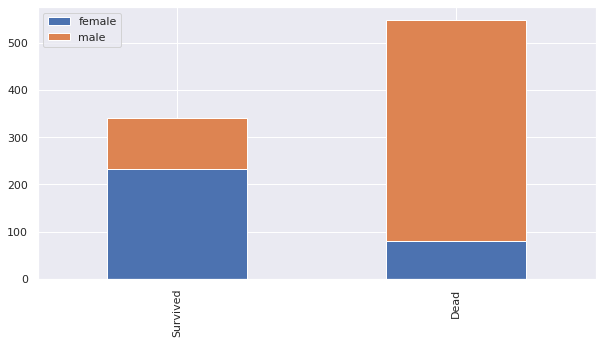

In [149]:
bar_chart('Sex')

In [150]:
train_test_data = [train] #Find Title from Name Column

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [151]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Lady          1
Sir           1
Countess      1
Capt          1
Mme           1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

In [152]:
#Mapping Title into number
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

In [153]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [154]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [155]:
train.drop('Name', axis=1, inplace=True)

In [156]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [157]:
# sex maping 
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [158]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [159]:
#Missing value fillup of Age
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)


In [160]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

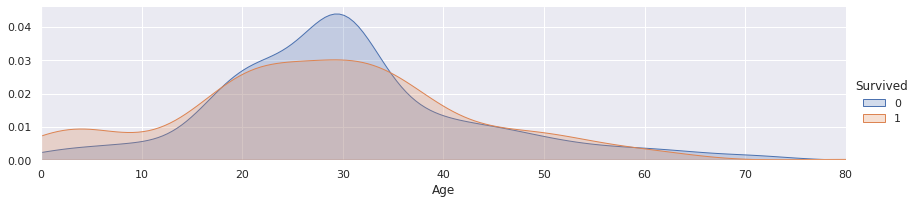

In [161]:
#Different age is existing. Divide in Catagorial Data
facet = sns.FacetGrid(train, hue="Survived",aspect=4) #facetgrid is used to send the data frame, hue is color properties
facet.map(sns.kdeplot,'Age',shade= True) # age is used becoz its on age basis
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

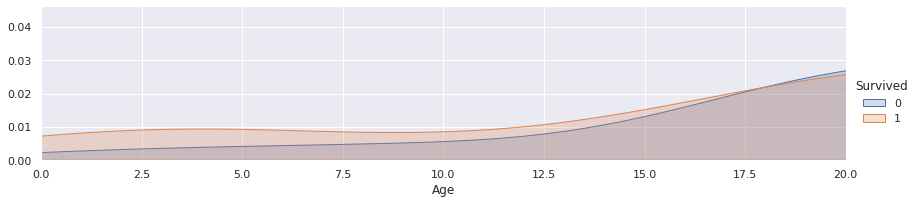

In [162]:
#Different age is existing. Divide in Catagorial Data
facet = sns.FacetGrid(train, hue="Survived",aspect=4) #facetgrid is used to send the data frame, hue is color properties
facet.map(sns.kdeplot,'Age',shade= True) # age is used becoz its on age basis
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

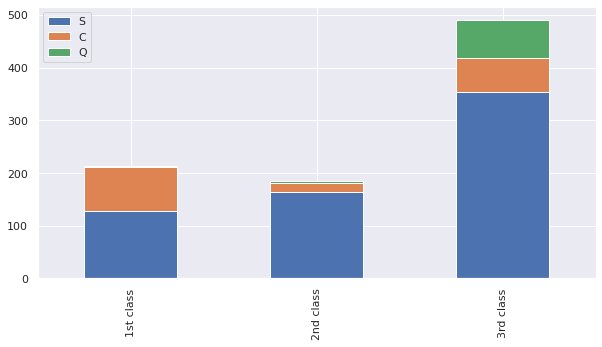

In [163]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [164]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S') #s ea beshi uthse tai baki gula s diye disi
  

In [165]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [166]:
#mapping embark 
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [167]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


In [168]:
#maping by fare
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [169]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,35.0,0,0,373450,0.0,NaN,0,0


In [170]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,35.0,0,0,373450,0.0,NaN,0,0


In [171]:
features_drop = ['Ticket', 'Cabin']
train = train.drop(features_drop, axis=1)

In [172]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,0.0,0,0
1,2,1,1,1,38.0,1,0,2.0,1,2
2,3,1,3,1,26.0,0,0,0.0,0,1
3,4,1,1,1,35.0,1,0,2.0,0,2
4,5,0,3,0,35.0,0,0,0.0,0,0


In [173]:
# (X_TRAIN->train_data, Y_TRAIN->target), X_TEST, Y_TEST
train_data = train.drop('Survived', axis=1)     
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

In [174]:
#Start Confusion Matrix Evaluation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=.30, random_state=42) #70% train data will go to x train , 30% train data will go to x test. 70% target data will go to y train and 30% target to y test
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print(y_test) #will show results

y_test.value_counts()

X_train:  (623, 9)
X_test:  (268, 9)
y_train:  (623,)
y_test:  (268,)
709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: Survived, Length: 268, dtype: int64


0    157
1    111
Name: Survived, dtype: int64

In [175]:
#Train the dataset

# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier() #load algo to a variable
dt.fit(X_train, y_train) #x train hochhe total train data y train survive er 70%
y_pred = dt.predict(X_test) #test result

In [176]:
#performance evaluation

from sklearn.metrics import confusion_matrix,classification_report #classification er base confusion matrix . prediction er shob hishab nikash confusion matrix ea thakbe 
print(confusion_matrix(y_test, y_pred)) #y test survive datar 30% 
print(classification_report(y_test,y_pred))

[[130  27]
 [ 33  78]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       157
           1       0.74      0.70      0.72       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.77      0.78      0.78       268

